
# SVM: Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn import under_sampling, over_sampling
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.



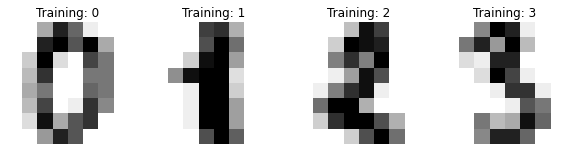

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



Code Reference: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

Reading: <br>
   1. https://towardsdatascience.com/support-vector-machine-support-vector-classifier-maximal-margin-classifier-22648a38ad9c <br>
   2. https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200

In [3]:

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.14, shuffle=False)


# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]

sm = SMOTE(random_state=None)
X_res, y_res = sm.fit_resample(X_train, y_train.ravel())

# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_res, y_res)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [4]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.204379,0.006736,0.057585,0.004305,5,0.01,"{'C': 5, 'gamma': 0.01}",0.777070,0.796178,0.805732,...,0.806369,0.024120,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.054165,0.000189,0.027417,0.000236,5,0.001,"{'C': 5, 'gamma': 0.001}",0.990446,0.993631,1.000000,...,0.993631,0.003489,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.028583,0.000373,0.021589,0.000247,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.984076,0.990446,0.993631,...,0.986624,0.004681,4,0.995223,0.996019,0.994427,0.995223,0.996815,0.995541,0.000812
3,0.200473,0.000544,0.056051,0.001639,10,0.01,"{'C': 10, 'gamma': 0.01}",0.777070,0.796178,0.805732,...,0.806369,0.024120,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.054055,0.000248,0.028992,0.000261,10,0.001,"{'C': 10, 'gamma': 0.001}",0.990446,0.993631,1.000000,...,0.993631,0.003489,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.025768,0.000419,0.020391,0.000413,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.984076,0.990446,0.993631,...,0.987898,0.003714,3,0.997611,0.997611,0.998408,0.998408,0.998408,0.998089,0.000390


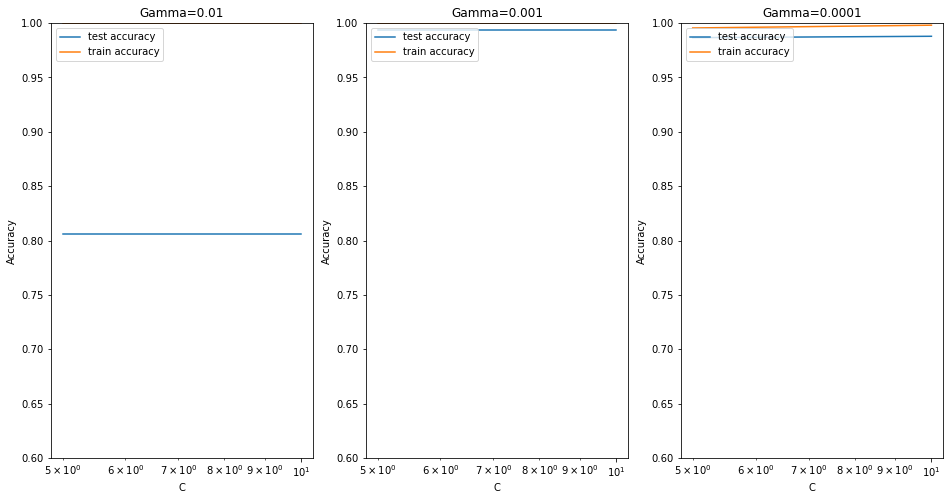

In [5]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [6]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9936305732484076 corresponding to hyperparameters {'C': 5, 'gamma': 0.001}


accuracy 0.9484126984126984 

[[25  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  2  0  1  3  0]
 [ 0  0  0  0 23  0  0  0  0  3]
 [ 0  0  0  0  0 26  0  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0]
 [ 0  2  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  1  0  0  1 24]] 

Recall metric in the testing dataset: 100.0%


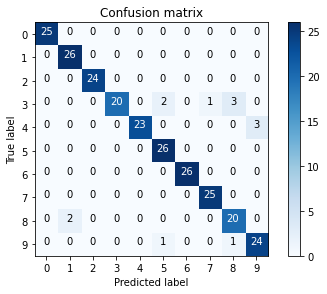

In [7]:
# model with optimal hyperparameters

# model
#model = SVC(C=5, gamma=0.001, kernel="rbf")

#model.fit(X_res, y_res)
#y_pred = model.predict(X_test)

estimator = SVC(C=5, gamma=0.001, kernel="rbf", class_weight="balanced")
classifier = OneVsRestClassifier(estimator)
classifier.fit(X_res, y_res)
y_pred = classifier.predict(X_test)


import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix

class_names = [0,1,2,3,4,5,6,7,8,9]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()